# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

training_file = 'dataset/train.p'
validation_file = 'dataset/valid.p'
testing_file = 'dataset/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Some Input size info for debugging
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)
print(X_train[1000, :, :, 1].shape)
print(len(X_train), len(y_train))
print(X_train.shape[1:4], y_train.shape[0])
print(X_test.shape[0], y_test.shape[0])
print(X_valid.shape[0], y_valid.shape[0])
print(len(np.unique(np.concatenate((y_train, y_test, y_valid)))))

(34799, 32, 32, 3) (34799,)
(4410, 32, 32, 3) (4410,)
(12630, 32, 32, 3) (12630,)
(32, 32)
34799 34799
(32, 32, 3) 34799
12630 12630
4410 4410
43


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Use python, pandas or numpy methods rather than hard coding the results

#Number of training examples
n_train = X_train.shape[0]

#Number of testing examples
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:4]

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(np.concatenate((y_train, y_valid, y_test)) ))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

12


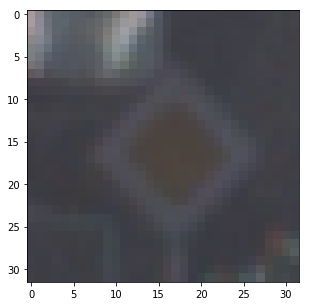

In [3]:
### Data exploration visualization code goes here.
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Displaying a random image from a training set and its label
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(5,5))
plt.imshow(image[:,:], cmap="gray")
print(y_train[index])


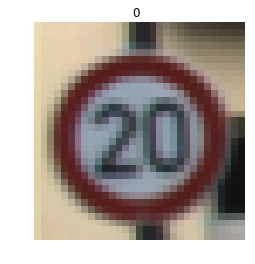

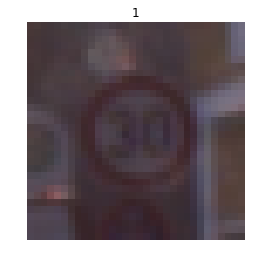

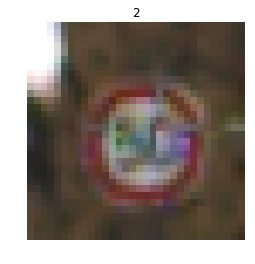

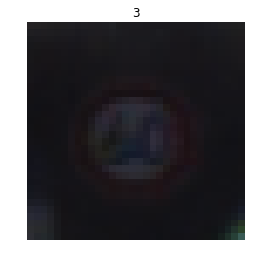

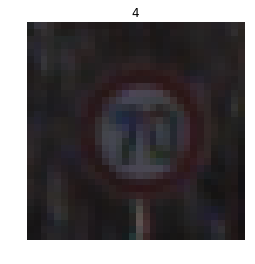

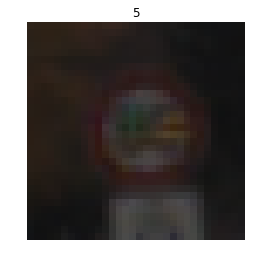

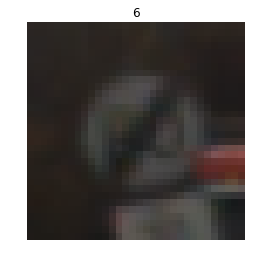

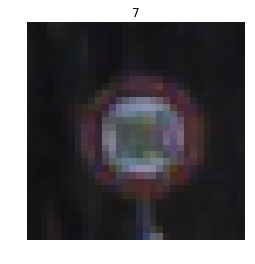

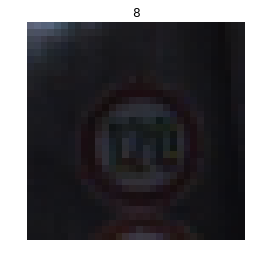

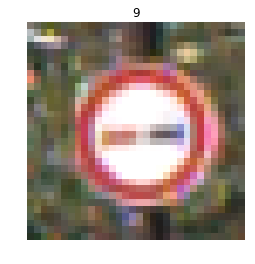

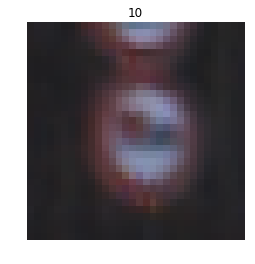

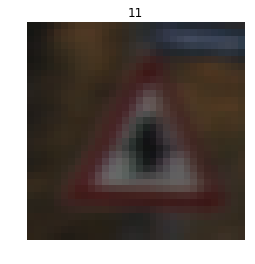

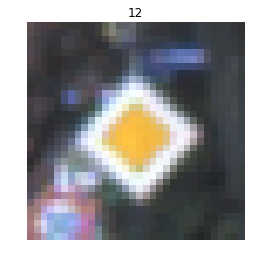

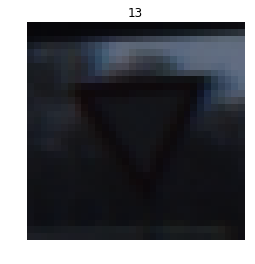

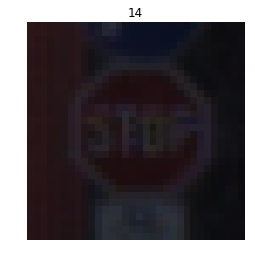

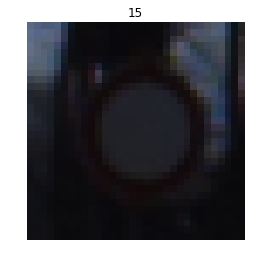

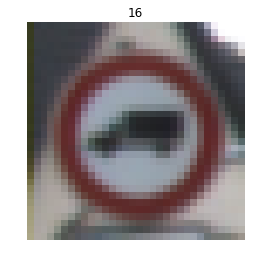

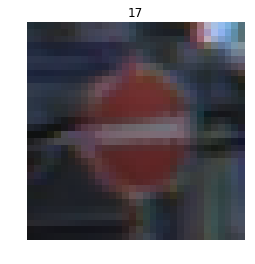

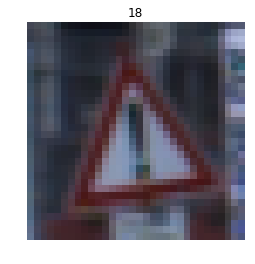

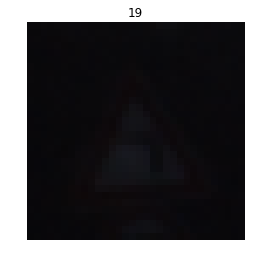

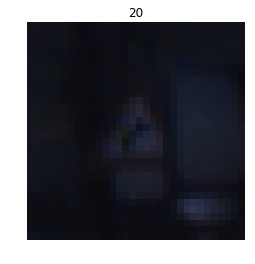

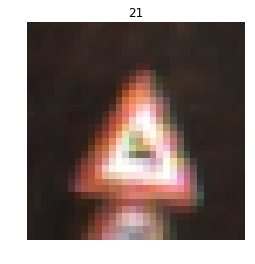

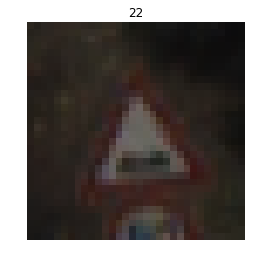

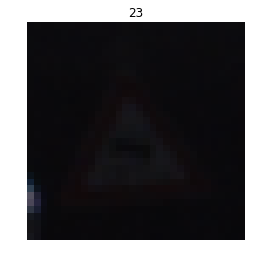

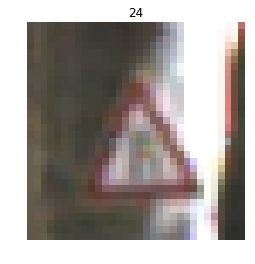

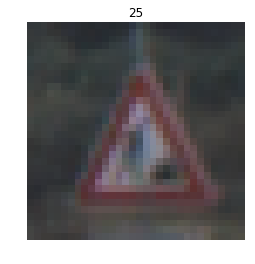

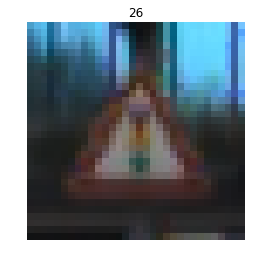

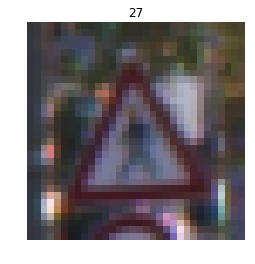

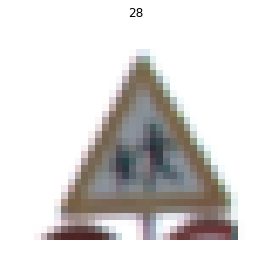

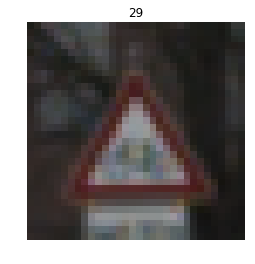

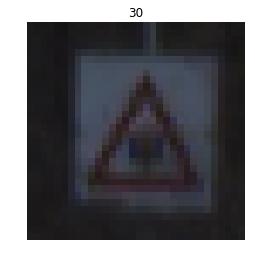

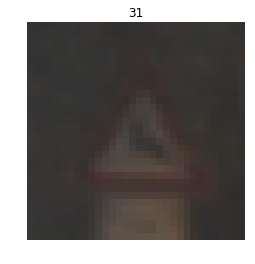

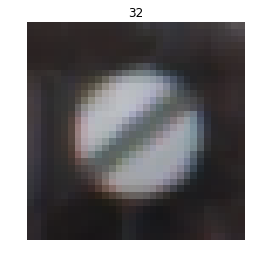

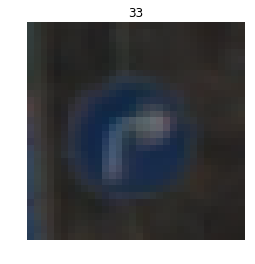

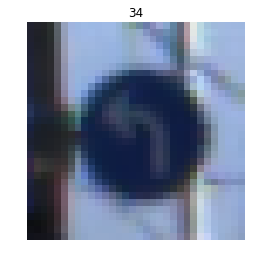

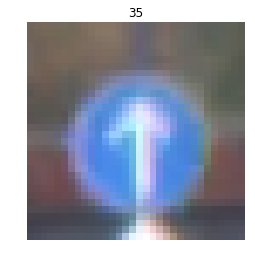

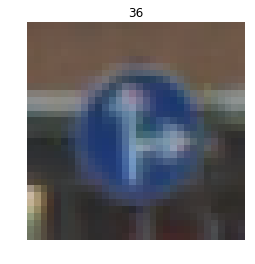

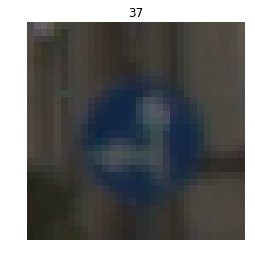

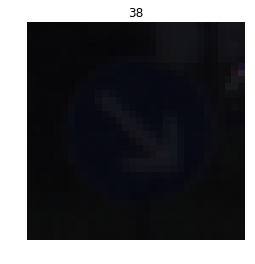

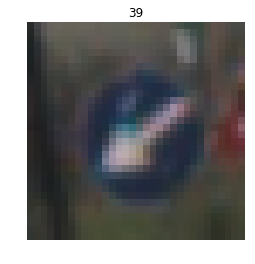

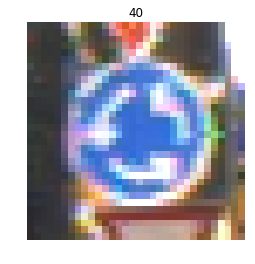

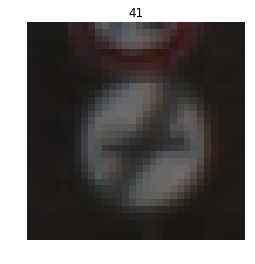

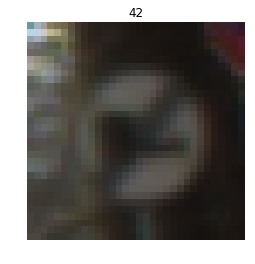

In [4]:
# Displaying one image per class from the training set
num_of_samples = []
for i in range(n_classes):
    #plt.subplot(11, 4, i+1)
    imgs_class = X_train[y_train == i] # picking the class of images
    #print(X_train[y_train == i][0].shape)
    plt.imshow(X_train[y_train == i][0].squeeze(), cmap="gray")#drawing the first image of each class
    plt.title(i)
    plt.axis('off')
    num_of_samples.append(len(imgs_class))
    plt.show()

In [ ]:
#Histogram of the classes in the dataset
print('Number of samples per class in the training set:', num_of_samples)

# Overall Histogram of labels
plt.subplot(2, 2, 1)
plt.hist(np.concatenate((y_train, y_valid, y_test)), n_classes, normed=1)
plt.xlabel('Label ID')
plt.ylabel('probability density')
plt.title('Overall Histogram of labels')

# Histogram of labels in training set
plt.subplot(2, 2, 2)
plt.hist(y_train, n_classes, normed=1)
plt.xlabel('Label ID')
plt.ylabel('probability density')
plt.title('Histogram of labels in training set')

# Histogram of labels in validation set
plt.subplot(2, 2, 3)
plt.hist(y_valid, n_classes, normed=1)
plt.xlabel('Label ID')
plt.ylabel('probability density')
plt.title('Histogram of labels in validation set')

# Histogram of labels in test set
plt.subplot(2, 2, 4)
plt.hist(y_test, n_classes, normed=1)
plt.xlabel('Label ID')
plt.ylabel('probability density')
plt.title('Histogram of labels in test set')

plt.tight_layout()
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Size of training set after augmentation: (69598, 32, 32, 3)


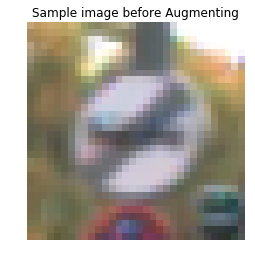

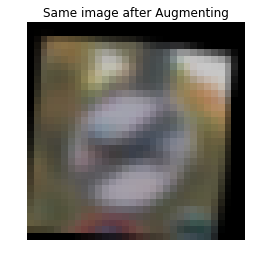

In [5]:
# Functions for data augmentation (Obtained from https://github.com/vxy10/ImageAugmentation)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

import numpy as np
%matplotlib inline
import matplotlib.image as mpimg

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    # Brightness 
    

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    img = augment_brightness_camera_images(img)
    
    return img

''' gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(15,15))
for i in range(10):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = transform_image(image,20,5,5)

    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()'''

# Generating augmented data before-hand
n_train_examples = len(X_train)
shape_of_X_train = X_train.shape
augment_multiple = 1 # Just one random augmented image for every training example

for i in range(augment_multiple):
    X_train_augmented_images = np.zeros(shape_of_X_train)
    for j in range(n_train_examples):

        X_train_augmented_images[j] = transform_image(X_train[j],20,5,5)
    X_train = np.append(X_train, X_train_augmented_images, axis = 0)
    X_train = X_train.astype(np.uint8)

y_train = np.tile(y_train, augment_multiple+1)

print("Size of training set after augmentation:", X_train.shape)

plt.imshow(X_train[100].squeeze(), cmap="gray")
plt.title('Sample image before Augmenting')
plt.axis('off')
plt.show()
plt.imshow(X_train[100+n_train_examples].squeeze(), cmap="gray")
plt.title('Same image after Augmenting')
plt.axis('off')
plt.show()

In [6]:
# Preprocessing the training dataset to have zero mean and unit variance
# And then, subtracting training mean from validation and test dataset and also dividing 
# validation and testing datasets from training's standard deviation

from sklearn.utils import shuffle

X_train = X_train.astype('float64')
X_valid = X_valid.astype('float64')
X_test = X_test.astype('float64')

training_mean = np.mean(X_train)
training_std = np.std(X_train)

X_train -= training_mean
X_train /= training_std

X_valid -= training_mean
X_valid /= training_std

X_test -= training_mean
X_test /= training_std

### Model Architecture

In [7]:
### Defining the architecture here.

import tensorflow as tf
import numpy as np
tf.reset_default_graph()

num_layers = 6
keep_prob = tf.placeholder("float", (num_layers))
from tensorflow.contrib.layers import flatten

def TrafficNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 0: Convolutional - Tries to learn best color space. Input = 32x32x3. Output = 32x32x3.
    conv0_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 3, 3), mean = mu, stddev = sigma))
    conv0_b = tf.Variable(tf.zeros(3))
    conv0   = tf.nn.conv2d(x, conv0_W, strides=[1, 1, 1, 1], padding='SAME') + conv0_b

     # Activation.
    conv0 = tf.nn.relu(conv0)
        
    # Layer 1: Convolutional. Input = 32x32x3. Output = 30x30x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(conv0, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)
        
    # Droput.
    conv1 = tf.nn.dropout(conv1, keep_prob[0])

    # Layer 2: Convolutional. Input = 30x30x32 Output = 28x28x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling and Dropout. Input = 28x28x64. Output = 14x14x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.dropout(conv2, keep_prob[1])

    # Layer 3: Convolutional.Input = 14x14x64 Output = 12x12x128.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(128))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b

    # Activation.
    conv3 = tf.nn.relu(conv3)

    # Pooling and Dropout Input = 12x12x128. Output = 6x6x128.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv3 = tf.nn.dropout(conv3, keep_prob[2])

    # Flatten. Input = 6x6x128. Output = 4608.
    fc0   = flatten(conv3)
    
    # Layer 4: Fully Connected. Input = 4608. Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(4608, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # Activation and Dropout.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob[3])

    # Layer 5: Fully Connected. Input = 1024. Output = 1024.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(1024, 1024), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(1024))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b

    # Activation and Dropout.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob[4])
        
    # Layer 6: Fully Connected. Input = 1024. Output = 512.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(1024, 512), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(512))
    fc3   = tf.matmul(fc2, fc3_W) + fc3_b

    # Activation and Dropout.
    fc3    = tf.nn.relu(fc3)
    fc3    = tf.nn.dropout(fc3, keep_prob[5])

    # Layer 7: Fully Connected. Input = 512. Output = 43 (Number of classes).
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(512, n_classes), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.add(tf.matmul(fc3, fc4_W), fc4_b, name='logits')
        
    regularizer_term = tf.nn.l2_loss(conv0_W) + tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(conv3_W) \
                    + tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc3_W) + tf.nn.l2_loss(fc4_W)
    return conv1, conv2, conv3, logits, regularizer_term

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
from math import ceil

with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], image_shape[2]), name='x-input')
    y = tf.placeholder(tf.int32, (None), name='y-input')
    one_hot_y = tf.one_hot(y, n_classes, name='y-one-hot')

rate = 0.001
beta = 0.005
global_step = tf.placeholder(tf.int32)
conv1, conv2, conv3, logits, regularizer_term = TrafficNet(x)
with tf.name_scope('optimizer'):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
    loss_operation = tf.reduce_mean(tf.reduce_mean(cross_entropy) + beta*regularizer_term)
    learning_rate = tf.train.exponential_decay(rate, global_step, 1, 0.99, staircase=True, name=None)
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
confusion_matrix = tf.contrib.metrics.confusion_matrix(tf.argmax(one_hot_y, 1), tf.argmax(logits, 1), n_classes)

#train_accuracy_summary = tf.summary.scalar('Train_Accuracy', accuracy_operation)
#valid_accurary_summary = tf.summary.scalar('Validation_Accuracy', accuracy_operation)
    
#loss_summary = tf.summary.scalar('Training_Loss', loss_operation)
#learning_rate_summary = tf.summary.scalar('Learning_Rate', learning_rate)

#merged = tf.summary.merge_all()
#train_writer = tf.summary.FileWriter('tensor_board/', tf.Session().graph)
#valid_writer = tf.summary.FileWriter('tensor_board/')

saver = tf.train.Saver()

def evaluate(X_data, y_data, conf_matrix = 0):
    num_examples = len(X_data)
    total_accuracy = 0
    if conf_matrix == 1:
        overall_confusion_matrix = tf.zeros([n_classes, n_classes], tf.int32)
        batch_conf_matrix = tf.zeros([n_classes, n_classes], tf.int32)
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        if conf_matrix == 1:
            accuracy, batch_conf_matrix = sess.run([accuracy_operation,confusion_matrix], feed_dict={x: batch_x, y: batch_y, keep_prob: np.ones(num_layers)})      
        else:
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: np.ones(num_layers)})      
        
        total_accuracy += (accuracy * len(batch_x))
        
        if conf_matrix == 1:
            overall_confusion_matrix += batch_conf_matrix
    
    if conf_matrix == 1:
        return total_accuracy / num_examples, overall_confusion_matrix
    else:
        return total_accuracy / num_examples

In [9]:
### Train your model here.
import time

EPOCHS = 100
BATCH_SIZE = 64

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("Training...")
    print()
    best_valid_accuracy = None
    best_epoch = 0
    for i in range(EPOCHS):
        X_train_epoch, y_train_epoch = shuffle(X_train, y_train)
        num_examples = len(X_train)
        start_time = time.time()
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_epoch[offset:end], y_train_epoch[offset:end]
            _, loss, learning_rate_val, global_step_val = sess.run([training_operation, loss_operation, 
                            learning_rate, global_step], feed_dict={x: batch_x, y: batch_y, global_step:i, 
                                                        keep_prob: np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])})
            #train_writer.add_summary(loss_write_summary, i)
            #train_writer.add_summary(learning_rate_write_summary, i)
        
        with tf.name_scope('accuracy'):
            train_accuracy = evaluate(X_train[0:n_train], y_train[0:n_train])
            validation_accuracy = evaluate(X_valid, y_valid)
        elapsed_time = time.time() - start_time 

        print("\n")
        print("EPOCH {}: {:.2f} secs".format(i+1, elapsed_time))
        print("Learning Rate = {:.6f}, Train Loss = {:.3f}, Train Accurary = {:.3f}, Validation Accuracy = {:.4f}".format(learning_rate_val, loss, train_accuracy, validation_accuracy))
        if best_valid_accuracy == None:
            best_valid_accuracy = validation_accuracy
            best_epoch = i
            saver.save(sess, './TrafficNet')saver.save(sess, './TrafficNet')
            print("Best Model saved")
        elif validation_accuracy >= best_valid_accuracy:
            best_valid_accuracy = validation_accuracy
            best_epoch = i
            saver.save(sess, './TrafficNet')
            print("Best Model saved")
        elif i > (best_epoch+20):
            break
        else:
            pass


Training...



EPOCH 1: 67.78 secs
Learning Rate = 0.001000, Train Loss = 7.889, Train Accurary = 0.079, Validation Accuracy = 0.0798
Best Model saved


EPOCH 2: 66.98 secs
Learning Rate = 0.000990, Train Loss = 3.351, Train Accurary = 0.385, Validation Accuracy = 0.3533
Best Model saved


EPOCH 3: 67.12 secs
Learning Rate = 0.000980, Train Loss = 2.504, Train Accurary = 0.426, Validation Accuracy = 0.3732
Best Model saved


EPOCH 4: 67.35 secs
Learning Rate = 0.000970, Train Loss = 3.292, Train Accurary = 0.473, Validation Accuracy = 0.4524
Best Model saved


EPOCH 5: 67.38 secs
Learning Rate = 0.000961, Train Loss = 2.279, Train Accurary = 0.498, Validation Accuracy = 0.4537
Best Model saved


EPOCH 6: 67.37 secs
Learning Rate = 0.000951, Train Loss = 2.258, Train Accurary = 0.643, Validation Accuracy = 0.6098
Best Model saved


EPOCH 7: 67.42 secs
Learning Rate = 0.000941, Train Loss = 2.205, Train Accurary = 0.810, Validation Accuracy = 0.7667
Best Model saved


EPOCH 8: 67.46 secs

Accuracies from the trained model...
Train Accurary = 0.995, Validation Accuracy = 0.9839, Test Accuracy = 0.9717
Confusion Matrix on Validation Set


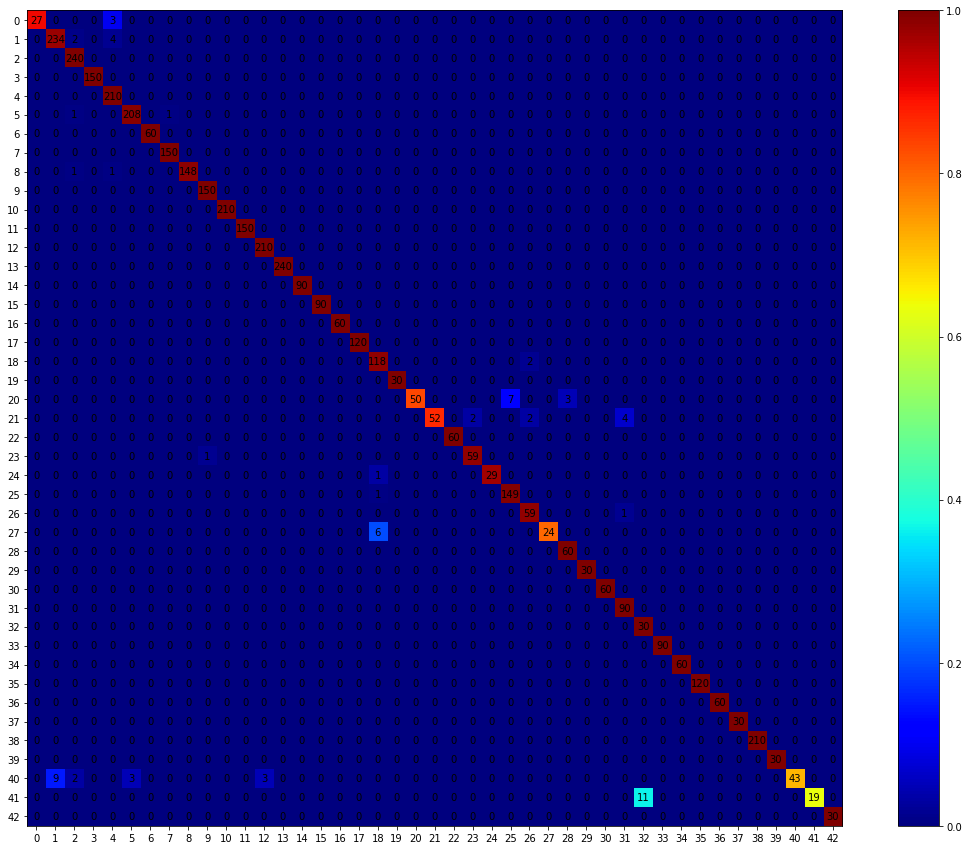

In [10]:
# This cell calculates the final training, validation and test accuracy for the trained model
with tf.Session() as sess:
    saver.restore(sess, './TrafficNet')
    train_accuracy = evaluate(X_train[0:n_train], y_train[0:n_train])
    validation_accuracy, valid_conf_matrix = evaluate(X_valid, y_valid, 1)
    test_accuracy = evaluate(X_test, y_test)
    print("Accuracies from the trained model...")
    print("Train Accurary = {:.3f}, Validation Accuracy = {:.4f}, Test Accuracy = {:.4f}".format(train_accuracy, validation_accuracy, test_accuracy))
    print("Confusion Matrix on Validation Set")
    conf_arr = valid_conf_matrix.eval()

# The code below creates a confusion matrix image on validation set
norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure(figsize=(20, 15))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

cb = fig.colorbar(res)
alphabet = range(0,43)
plt.xticks(range(width), alphabet[:width])
plt.yticks(range(height), alphabet[:height])
plt.savefig('confusion_matrix.png', format='png')

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(5, 32, 32, 3)
(5,)
float32
int32


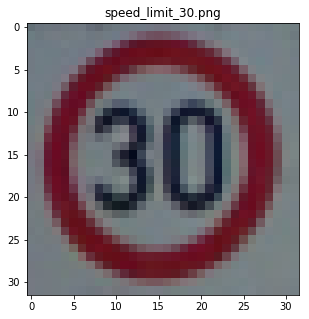

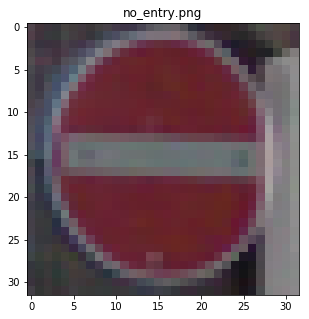

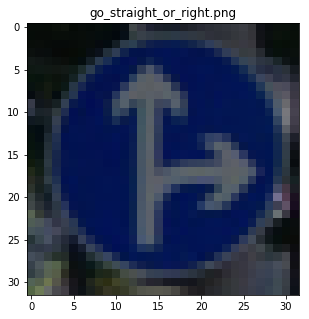

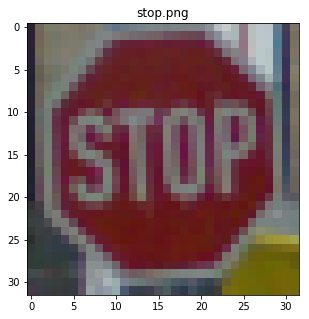

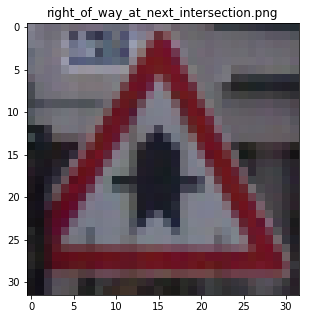

In [46]:
# This cell loads five images obtained from web and saves them in a 4D array
import os
import cv2
import matplotlib.image as mpimg

online_test_folder = "test_downloaded/"
test_images = os.listdir(online_test_folder)
testing_images_array = []
test_labels = np.array([1, 14, 17, 36, 11], dtype="int32")
for image_file in test_images:
    #reading in an image
    image = cv2.imread(online_test_folder+image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5,5))
    plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')
    plt.title(image_file)
    image = image.astype("float")
    image -= training_mean
    image /= training_std
    testing_images_array.append(image)
    #print(image.shape)

testing_images_array = np.asarray(testing_images_array, dtype = "float32")

print(testing_images_array.shape)
print(test_labels.shape)
print(testing_images_array.dtype)
print(test_labels.dtype)

### Predict the Sign Type for Each Image

In [45]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
with tf.Session() as sess:
    saver.restore(sess, './TrafficNet')
    softmax_probs = tf.nn.softmax(logits)
    predicted_labels = tf.argmax(softmax_probs, 1)
    predictions = sess.run(logits, feed_dict={x: testing_images_array, y: test_labels, keep_prob: np.ones(num_layers)})
    print("Below are the label IDs for the above test images respectively:\n", predictions)
    saver.save(sess, './TrafficNet')
    # 
    #y: test_labels, 

TypeError: Cannot interpret feed_dict key as Tensor: Can not convert a int into a Tensor.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, './TrafficNet')
    accuracy = sess.run(accuracy_operation, feed_dict={x:testing_images_array, y:test_labels, keep_prob: np.ones(num_layers)})
    print("Accuracy on signs found on web: {:.3f}".format(accuracy))  

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

with tf.Session() as sess:
    saver.restore(sess, './TrafficNet')
    probs, encoded = sess.run([softmax_probs, one_hot_y], feed_dict={x:testing_images_array, y: test_labels, keep_prob: np.ones(num_layers)}) 
    np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
    print("Below are the top 5 softmax probabilities and their respective Label ID's:\n")
    print(sess.run(tf.nn.top_k(tf.constant(probs), k=5)))

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

with tf.Session() as sess:
    saver.restore(sess, './TrafficNet')
    my_tensor = sess.graph.get_tensor_by_name('Conv_Layer_1/Convolution1:0')
    outputFeatureMap(testing_images_array[0], my_tensor, activation_min=-1, activation_max=-1 ,plt_num=1)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 